<b> Questions to answer: </b>
1. Which driver signups are most likely to start driving
2. What factors are best at predicting whether a signup will result in driving and offer insights

Dataset provided contains driver's background information

<b> Data description: </b>

id: driver_id

city_id : city_id this user signed up in

signup_os : signup device of the user (“android”, “ios”, “website”, “other”)

signup_channel : what channel did the driver sign up from (“offline”, “paid”, “organic”, “referral”)

signup_timestamp : timestamp of account creation; local time in the form ‘YYYYMMDD’

bgc_date : date of background check consent; in the form ‘YYYYMMDD’

vehicle_added_date : date when driver’s vehicle information was uploaded; in the form ‘YYYYMMDD’

first_trip_date : date of the first trip as a driver; in the form ‘YYYYMMDD’

vehicle_make: make of vehicle uploaded (i.e. Honda, Ford, Kia)

vehicle_model: model of vehicle uploaded (i.e. Accord, Prius, 350z)

vehicle_year: year that the car was made; in the form ‘YYYY’

In [2]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv("./data/ds_challenge.csv")
data.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


In [35]:
data.columns.values

array(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date'], dtype=object)

In [36]:
data.count()

id                      54681
city_name               54681
signup_os               47824
signup_channel          54681
signup_date             54681
bgc_date                32896
vehicle_added_date      13134
vehicle_make            13223
vehicle_model           13223
vehicle_year            13223
first_completed_date     6137
dtype: int64

In [37]:
data_percent = data.count() / len(data)
print(data_percent)

id                      1.000000
city_name               1.000000
signup_os               0.874600
signup_channel          1.000000
signup_date             1.000000
bgc_date                0.601598
vehicle_added_date      0.240193
vehicle_make            0.241821
vehicle_model           0.241821
vehicle_year            0.241821
first_completed_date    0.112233
dtype: float64


The parameters with lot of missing values may not contain useful information for modeling. Hence, lets assume a cutoff of 60% non-NaN values and drop the parameters with values less than that. 

In [38]:
data_percent[data_percent > 0.6]

id                1.000000
city_name         1.000000
signup_os         0.874600
signup_channel    1.000000
signup_date       1.000000
bgc_date          0.601598
dtype: float64

In [39]:
valid_parameters = data_percent[data_percent > 0.6].index.values
print(valid_parameters)

['id' 'city_name' 'signup_os' 'signup_channel' 'signup_date' 'bgc_date']


In [46]:
valid_parameters = np.append( valid_parameters, 'first_completed_date')

In [47]:
# Retain only valid_parameters in the dataframe:
data = data[valid_parameters]
data.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,NaN


<b> Is 'id' a unique variable ? </b>

In [22]:
id_unique_count = len(data['id'].unique())
print("id_unique_count: %d" %id_unique_count)
print("Length of the dataframe: %d" %len(data))

id_unique_count: 54681
Length of the dataframe: 54681


Therefore 'id' is a unique value for each user as expected and can be assigned as index of the dataframe

In [48]:
data = data.set_index("id", drop = True)
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['bgc_date'] = pd.to_datetime(data['bgc_date'])
data['first_completed_date'] = pd.to_datetime(data['first_completed_date'])

In [49]:
data.head()

,city_name,signup_os,signup_channel,signup_date,bgc_date,first_completed_date
id,,,,,,
1,Strark,ios web,Paid,2016-01-02,NaT,NaT
2,Strark,windows,Paid,2016-01-21,NaT,NaT
3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT
4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03
5,Strark,android web,Referral,2016-01-10,2016-01-25,NaT


As we know, signup_os and bgc_date has missing values that needs to be replaced

## Data Exploration:

<b> Let's do some data exploration to help replace missing values: </b>

### 1. Frequency matrix:

In [54]:
del df_group1

In [50]:
df_group1 = data.groupby(['signup_channel', 'city_name', 'signup_os'])['signup_date'].count()
df_group1 = df_group1.reset_index()
df_group1.columns = ['signup_channel', 'city_name', 'signup_os', 'Count']
df_group1.head()

,signup_channel,city_name,signup_os,Count
0,Organic,Berton,android web,1052
1,Organic,Berton,ios web,1427
2,Organic,Berton,mac,699
3,Organic,Berton,other,374
4,Organic,Berton,windows,697


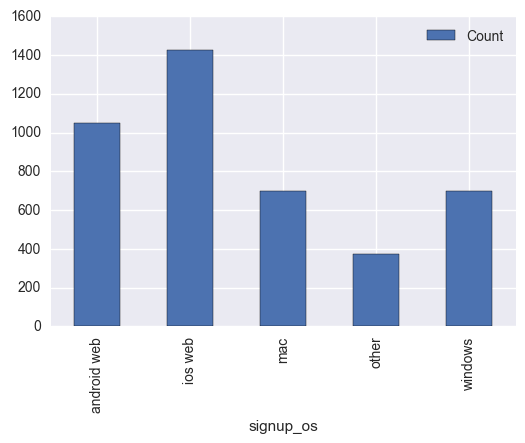

In [10]:
df_group1.ix[ (df_group1['signup_channel'] == 'Organic') & (df_group1['city_name'] == 'Berton')].plot.bar( x = 'signup_os', y = 'Count', figsize = (6, 4) )

From the above plot, it is obvious that when the 'signup_channel' is Organic and 'city_name' is berton then the user is more likely to have signedup from ios web and the next option is high probability is android web. 

Although, the likelihood for being signedup from ios web is higher than the other options, we cannot just ignore them as they are not negligible. 

Let's look at another case:

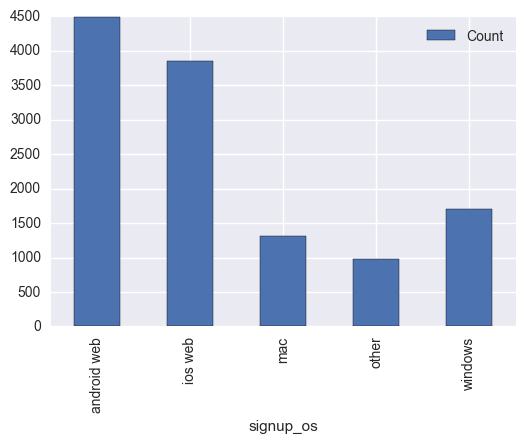

In [81]:
df_group1.ix[ (df_group1['signup_channel'] == 'Paid') & (df_group1['city_name'] == 'Strark')].plot.bar( x = 'signup_os', y = 'Count', figsize = (6, 4) )

In such cases, the two best methods to replace missing values are:
    1. Assign weight to each of the categories based on the count and pick randomly
    2. Develop a model by assuming 'signup_os' as the target variable with 'signup_channel' and 'city_name' as predictors

Lets add probability for each group in the frequency table

In [51]:
df_group1_freq = data.groupby(['signup_channel', 'city_name'])['signup_os'].count()
df_group1_freq = df_group1_freq.reset_index()
df_group1_freq.columns = ['signup_channel', 'city_name', 'Total']
df_group1_freq.head()

,signup_channel,city_name,Total
0,Organic,Berton,4249
1,Organic,Strark,5668
2,Organic,Wrouver,978
3,Paid,Berton,8708
4,Paid,Strark,12350


In [52]:
df = pd.merge(df_group1, df_group1_freq, how = 'outer', on=['signup_channel', 'city_name'])

In [53]:
df.head(10)

,signup_channel,city_name,signup_os,Count,Total
0,Organic,Berton,android web,1052,4249
1,Organic,Berton,ios web,1427,4249
2,Organic,Berton,mac,699,4249
3,Organic,Berton,other,374,4249
4,Organic,Berton,windows,697,4249
5,Organic,Strark,android web,1529,5668
6,Organic,Strark,ios web,1814,5668
7,Organic,Strark,mac,929,5668
8,Organic,Strark,other,430,5668
9,Organic,Strark,windows,966,5668


In [54]:
df['prob'] = df['Count'] / df['Total']

In [55]:
df.head()

,signup_channel,city_name,signup_os,Count,Total,prob
0,Organic,Berton,android web,1052,4249,0.247588
1,Organic,Berton,ios web,1427,4249,0.335844
2,Organic,Berton,mac,699,4249,0.164509
3,Organic,Berton,other,374,4249,0.088021
4,Organic,Berton,windows,697,4249,0.164039


Now its time to fill NaNs in the 'signup_os' column

In [93]:
df.shape

(45, 6)

In [56]:
df_group1_prob_dict = df.groupby(['signup_channel', 'city_name']).apply(lambda x: { x1:y1 for x1, y1 in x[['signup_os', 'prob']].values}).reset_index()
df_group1_prob_dict.columns = ['signup_channel', 'city_name', 'prob_dict']
df_group1_prob_dict

,signup_channel,city_name,prob_dict
0,Organic,Berton,"{'windows': 0.16403859731701576, 'mac': 0.1645..."
1,Organic,Strark,"{'windows': 0.17043048694424842, 'mac': 0.1639..."
2,Organic,Wrouver,"{'windows': 0.20245398773006135, 'mac': 0.1717..."
3,Paid,Berton,"{'windows': 0.1619200734956362, 'mac': 0.11862..."
4,Paid,Strark,"{'windows': 0.1382995951417004, 'mac': 0.10615..."
5,Paid,Wrouver,"{'windows': 0.17680950666186532, 'mac': 0.0975..."
6,Referral,Berton,"{'windows': 0.09788308409399883, 'mac': 0.1118..."
7,Referral,Strark,"{'windows': 0.09795570698466781, 'mac': 0.1061..."
8,Referral,Wrouver,"{'windows': 0.12430632630410655, 'mac': 0.0987..."


We can use the above probability table to fill the NaNs in 'signup_os' column

In [57]:
dat = data.copy()

In [61]:
dat.ix[(dat['signup_channel'] == 'Organic') & (dat['city_name'] == 'Berton') & dat['signup_os'].isnull(), 'signup_os']

Series([], Name: signup_os, dtype: object)

In [59]:
for index_, x in df_group1_prob_dict[['signup_channel', 'city_name', 'prob_dict']].iterrows():
    df_temp = dat.ix[(dat['signup_channel'] == x[0]) & (dat['city_name'] == x[1]) & dat['signup_os'].isnull(), 'signup_os']
    keys, values = zip(*x['prob_dict'].items())
    values_ = np.random.choice(keys, p = values, size = len(df_temp))
    dat.ix[(dat['signup_channel'] == x[0]) & (dat['city_name'] == x[1]) & dat['signup_os'].isnull(), 'signup_os'] = values_

In [60]:
data_percent = dat.count() / len(dat)
print(data_percent)

city_name               1.000000
signup_os               1.000000
signup_channel          1.000000
signup_date             1.000000
bgc_date                0.601598
first_completed_date    0.112233
dtype: float64


<b> The missing values on 'signup_os' replaced </b>

In [62]:
dat.to_csv("./data/ds_challenge_replaced_signup_os.csv")

Now lets focus on replacing NaNs in bgc_date

In [98]:
dat = pd.read_csv("./data/ds_challenge_replaced_signup_os.csv")
dat['signup_date'] = pd.to_datetime(dat['signup_date'])
dat['bgc_date'] = pd.to_datetime(dat['bgc_date'])
dat['first_completed_date'] = pd.to_datetime(dat['first_completed_date'])                            

In [99]:
dat.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,first_completed_date
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,NaT


As signup_date is a datetime column and it might be correlated with bgc_date in many ways such as day, month, etc. 

In [100]:
dat['signup_day'] = [x.weekday() for x in dat.signup_date]
dat['signup_month'] = [x.month for x in dat.signup_date]

Let's assume that when 'first_completed_date' is NaT then the driver didnt start driving after signup (0) and when there is a date then the driver started driving after signup

We will create a new binary variable 'target' based on 'first_completed_date'<br>
Target = 0 ( 'first_completed_date' is NaT ) <br>
Target = 1 ( 'first_completed_date' is a date )

In [101]:
dat.ix[dat['first_completed_date'].isnull(), 'Target'] = 0
dat.ix[dat['first_completed_date'].notnull(), 'Target'] = 1

In [78]:
dat.head(10)

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,first_completed_date,signup_day,signup_month,Target
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,5,1,0.0
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,3,1,0.0
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,0,1,0.0
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,4,1,1.0
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,NaT,6,1,0.0
5,6,Strark,android web,Referral,2016-01-18,2016-01-18,NaT,0,1,0.0
6,7,Strark,ios web,Paid,2016-01-14,2016-01-16,2016-01-23,3,1,1.0
7,8,Strark,ios web,Referral,2016-01-26,2016-02-05,NaT,1,1,0.0
8,9,Strark,mac,Referral,2016-01-05,NaT,NaT,1,1,0.0
9,10,Berton,ios web,Paid,2016-01-25,NaT,NaT,0,1,0.0


Lets also include the number of days taken to allow background check

In [102]:
dat['days_bgc'] = dat['bgc_date'] - dat['signup_date']
dat['days_drive'] = dat['first_completed_date'] - dat['bgc_date']

Now the columns 'signup_date', 'bgc_date', and 'first_completed_date' can be deleted as we have transformed this into new variables

In [103]:
dat.drop(['signup_date', 'bgc_date', 'first_completed_date'], inplace = True, axis = 1)

In [81]:
dat.head(10)

,id,city_name,signup_os,signup_channel,signup_day,signup_month,Target,days_bgc,days_drive
0,1,Strark,ios web,Paid,5,1,0.0,NaT,NaT
1,2,Strark,windows,Paid,3,1,0.0,NaT,NaT
2,3,Wrouver,windows,Organic,0,1,0.0,0 days,NaT
3,4,Berton,android web,Referral,4,1,1.0,5 days,0 days
4,5,Strark,android web,Referral,6,1,0.0,15 days,NaT
5,6,Strark,android web,Referral,0,1,0.0,0 days,NaT
6,7,Strark,ios web,Paid,3,1,1.0,2 days,7 days
7,8,Strark,ios web,Referral,1,1,0.0,10 days,NaT
8,9,Strark,mac,Referral,1,1,0.0,NaT,NaT
9,10,Berton,ios web,Paid,0,1,0.0,NaT,NaT


In [104]:
dat.signup_month.unique()

array([1], dtype=int64)

<b> All are signed up in the same month so signup month is not a good predictor </b>

In [105]:
del dat['signup_month']

In [106]:
dat.signup_day.unique()

array([5, 3, 0, 4, 6, 1, 2], dtype=int64)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 7 Text xticklabel objects>)

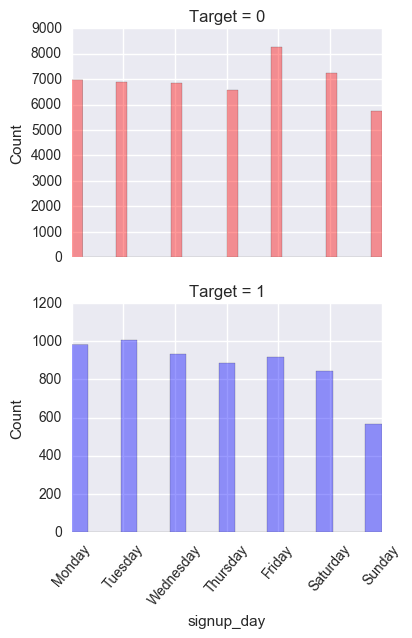

In [85]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (4, 6.5) )
sns.distplot(dat.ix[dat.Target == 0, 'signup_day'], color = 'r', kde=False, ax = ax1  )
sns.distplot(dat.ix[dat.Target == 1, 'signup_day'], color = 'b', kde=False, ax = ax2 )
ax1.set_ylabel('Count')
ax1.set_xlabel('')
ax1.set_title('Target = 0')
ax2.set_ylabel('Count')
ax2.set_title('Target = 1')
ax2.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=50)

<b> The above plot clearly shows that signup weekday is not a good predictor of whether he/she will drive </b>

In [107]:
del dat['signup_day']

In [108]:
def time_delta_int(x):
    try:
        return x.days
    except:
        return np.NaN

In [109]:
dat['days_bgc'] = dat['days_bgc'].apply(time_delta_int)
dat['days_drive'] = dat['days_drive'].apply(time_delta_int)

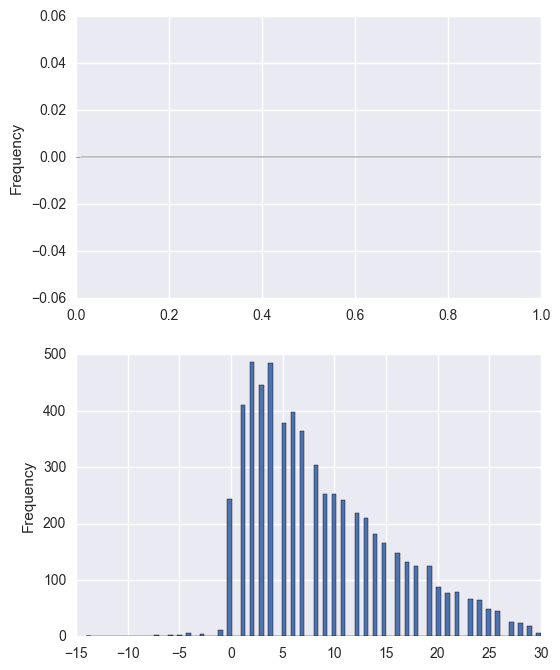

In [111]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (6, 8) )
dat.ix[ dat.Target == 0, 'days_drive'].plot.hist(bins = 100, ax = ax1 )
dat.ix[ dat.Target == 1, 'days_drive'].plot.hist(bins = 100, ax = ax2 )

In [112]:
dat.ix[ dat.Target == 0, 'days_drive'].unique()

array([ nan])

As expected, the no. of days to drive since bgc is NaN when the target is 0. Data integrity is maintained here. 
For modeling purposes, lets replace all NaNs with -1

When the target is 1, the no. of days to drive since bgc has a xxxx distribution. However, it has some negative values which means the driver started driving even before the bgc approval. The best way to handle this is just by dropping those rows as they are significantly less.
In this case, lets replace all NaNs with 0

This could be a could predictor as well.

In [120]:
dat.ix[dat.Target == 0, 'days_drive'].head()

0   -1.0
1   -1.0
2   -1.0
4   -1.0
5   -1.0
Name: days_drive, dtype: float64

In [119]:
dat.ix[dat.Target == 0, 'days_drive'] = dat.ix[dat.Target == 0, 'days_drive'].fillna(-1)

In [122]:
dat.ix[ (dat.Target == 1) & (dat.days_drive < 0)].count()

id                1.0
city_name         1.0
signup_os         1.0
signup_channel    1.0
Target            1.0
days_bgc          1.0
days_drive        1.0
dtype: float64

Drop rows with days_drive as negative and Target = 1

In [130]:
index_drop = dat.ix[(dat.Target == 1) & (dat.days_drive < 0)].index.values
dat.drop( dat.index[index_drop], inplace = True ).reset_index(drop = True)

In [136]:
dat.ix[ (dat.Target == 1) & (dat.days_drive < 0)].count()

id                0
city_name         0
signup_os         0
signup_channel    0
Target            0
days_bgc          0
days_drive        0
dtype: int64

Replace NaNs with -1 for days_drive when the 'Target' is 0

In [137]:
dat.ix[ dat.Target == 0, 'days_drive' ] = -1

In [139]:
dat.count() / len(dat)

id                1.000000
city_name         1.000000
signup_os         1.000000
signup_channel    1.000000
Target            1.000000
days_bgc          0.601358
days_drive        1.000000
dtype: float64

### days_bgc

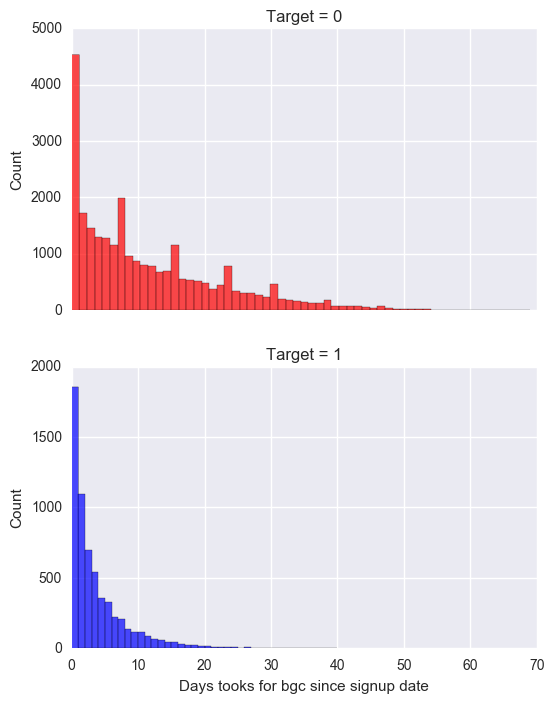

In [110]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (6, 8) )
dat.ix[ dat.Target == 0, 'days_bgc'].plot.hist(bins = 60, ax = ax1, color = 'red', alpha = 0.7 )
dat.ix[ dat.Target == 1, 'days_bgc'].plot.hist(bins = 40, ax = ax2, color = 'blue', alpha = 0.7 )
ax1.set_ylabel('Count')
ax1.set_title('Target = 0')
ax2.set_ylabel('Count')
ax2.set_title('Target = 1')
ax2.set_xlabel('Days tooks for bgc since signup date')

From the above plot, it is clear that as the number of days since signup increases the probability of approving background check and driving falls exponentially.

From the training set, if the days_bgc < 25 there is a finite probability, eventhough negligible, that the candidate will give approval for the backgroud check. However, beyond ~ 25 days it is highly unlikely to get approval for bgc.

Hence this parameter could be a good predictor of the target.

##### Time to replace NaNs in days_bgc columns

In [139]:
dat.count() / len(dat)

id                1.000000
city_name         1.000000
signup_os         1.000000
signup_channel    1.000000
Target            1.000000
days_bgc          0.601358
days_drive        1.000000
dtype: float64

I have also included the 'Target' in the groupby as we have significant difference in 'days_bgc' from the previous plot

In [142]:
dat.groupby(['city_name', 'signup_os', 'signup_channel', 'Target'])['days_bgc'].mean()

city_name  signup_os    signup_channel  Target
Berton     android web  Organic         0.0       11.693419
                                        1.0        3.953125
                        Paid            0.0       11.334671
                                        1.0        3.648936
                        Referral        0.0       11.810704
                                        1.0        3.279778
           ios web      Organic         0.0       11.476959
                                        1.0        3.604027
                        Paid            0.0       11.327600
                                        1.0        2.958824
                        Referral        0.0       12.298177
                                        1.0        2.895613
           mac          Organic         0.0       12.640000
                                        1.0        3.673469
                        Paid            0.0       11.341410
                                        1.0        3.

In [ ]:
Stratified sampling